In this module, I implement the stop and loss strategy. The methods are implemetation of definition 1,2, and 3 as well as propositions 1 & 2 of the paper, [When do stop loss stop losses)?](http://web.mit.edu/katykam/www/jobmarketpaperKMK.pdf)



In [1]:
""" 
Import data using yfinance.

output price, return in pandas data frame with either daily price data,
or 5 min interval price for upto within the past 60 days.
For daily price data, we only keep the opening price.

@author: Nischal

"""

' \nImport data using yfinance.\n\noutput price, return in pandas data frame with either daily price data,\nor 5 min interval price for upto within the past 60 days.\nFor daily price data, we only keep the opening price.\n\n@author: Nischal\n\n'

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import pandas as pd
import math
import numpy as np

In [3]:
def __init__(self):
    pass

In [4]:
equity = pdr.get_data_yahoo("ES", start="1993-01-05", end="2011-11-8")

[*********************100%***********************]  1 of 1 completed


In [5]:
equity.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-01,33.919998,34.430000,33.500000,33.590000,24.560225,2934300
2011-11-02,33.990002,34.560001,33.930000,34.220001,25.020866,2203700
2011-11-03,34.419998,34.919998,34.200001,34.770000,25.423018,1975100
2011-11-04,34.410000,34.709999,34.180000,34.660000,25.342577,1340700
2011-11-07,34.599998,34.939999,33.779999,34.410000,25.159790,1564800


In [6]:
bond = pdr.get_data_yahoo("TY", start="1993-01-05", end="2011-11-8")

[*********************100%***********************]  1 of 1 completed


Assuming the risk free rate to be 0

In [7]:
rf=0 #risk free rate


In [8]:
rt=equity['Close'].pct_change()
rt


Date
1993-01-05         NaN
1993-01-06    0.004739
1993-01-07   -0.018868
1993-01-08   -0.014423
1993-01-11    0.019512
                ...   
2011-11-01   -0.028348
2011-11-02    0.018756
2011-11-03    0.016072
2011-11-04   -0.003164
2011-11-07   -0.007213
Name: Close, Length: 4749, dtype: float64

In [9]:
rt.cumsum()

Date
1993-01-05         NaN
1993-01-06    0.004739
1993-01-07   -0.014129
1993-01-08   -0.028552
1993-01-11   -0.009039
                ...   
2011-11-01    0.819487
2011-11-02    0.838243
2011-11-03    0.854315
2011-11-04    0.851152
2011-11-07    0.843939
Name: Close, Length: 4749, dtype: float64

In [10]:
def crj(t,j):
    window = rt[t-j]
    return window.cumsum()[-1]

In [11]:
def P_return(j):
    return rt[j-1]

In [12]:
def F_return(j):
    return rf[j-1]

In [13]:
P_return(10-6)

-0.014423076923076872

In [15]:
len(equity['Close'])

4749

P->portfolio strategy \
st-> prop of asset allocated to P \
F->Risk free strategy \
st-1=0-> allocate to F \
st-1=1-> allocate to P

In [16]:
def stop_loss_policy(loss_thres,reentry_thres,j):
    
    prev_st = 1
    st = 1
    lst = []
    
    for i in range(j,len(equity)):
        
        if P_return(i-1) >= reentry_thres and prev_st == 0:
            st = 1
            
        elif crj(i,j) >= -loss_thres and prev_st == 1:
            st = 1
            
        elif P_return(i-1) < reentry_thres and prev_st == 0:
            st = 0
            
        elif crj(i,j) <- loss_thres and prev_st == 1:
            st = 0
            
        prev_st = st
        lst.append(st)
    return lst
        
        

In [17]:
stop_loss_policy(0.0123,0.213,20)

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
rt

Date
1993-01-05         NaN
1993-01-06    0.004739
1993-01-07   -0.018868
1993-01-08   -0.014423
1993-01-11    0.019512
                ...   
2011-11-01   -0.028348
2011-11-02    0.018756
2011-11-03    0.016072
2011-11-04   -0.003164
2011-11-07   -0.007213
Name: Close, Length: 4749, dtype: float64

In [19]:
def p0(loss_thres,reentry_thres,j):
    x=stop_loss_policy(loss_thres,reentry_thres,j)
    return x.count(0)/len(x)
    
    

In [20]:
p0(0.003,0.002,20)

0.47494184817086066

In [21]:
premium=pd.DataFrame({'st':stop_loss_policy(-0.001,-0.02,0),'rt':rt})
premium

,st,rt
Date,,
1993-01-05,1,NaN
1993-01-06,1,0.004739
1993-01-07,0,-0.018868
1993-01-08,1,-0.014423
1993-01-11,1,0.019512
...,...,...
2011-11-01,0,-0.028348
2011-11-02,1,0.018756
2011-11-03,1,0.016072


In [22]:
premium.groupby(['st']).mean()

,rt
st,
0,-0.008409
1,0.005318


In [23]:
Ex_rt_st=-0.008409

In [24]:
p0(0.001,-0.02,100)

0.32372553237255325

In [25]:
def stopping_premium(loss_thres,reentry_thres,j,rf=0):
    a=p0(loss_thres,reentry_thres,j)
    return a*(rf-Ex_rt_st)

In [26]:
stopping_premium(0.001,-0.02,100)

0.0027222080017208004

In [27]:
stopping_premium(-0.001,-0.02,0)

0.00314828427037271

In [28]:
def stopping_ratio(loss_thres,reentry_thres,j):
    ratio=stopping_premium(loss_thres,reentry_thres,j)/p0(loss_thres,reentry_thres,j)
    return ratio

In [29]:
stopping_ratio(-0.001,-0.02,0)

0.008409

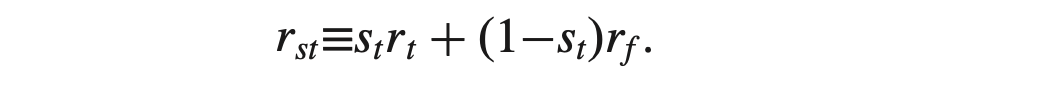

In [30]:
rf

0

In [31]:
def r_st(loss_thres,reentry_thres,j):
    return (stop_loss_policy(loss_thres,reentry_thres,j)*rt+0)

In [32]:
r_st(-0.001,-0.02,0).var()

0.0001451379093482177

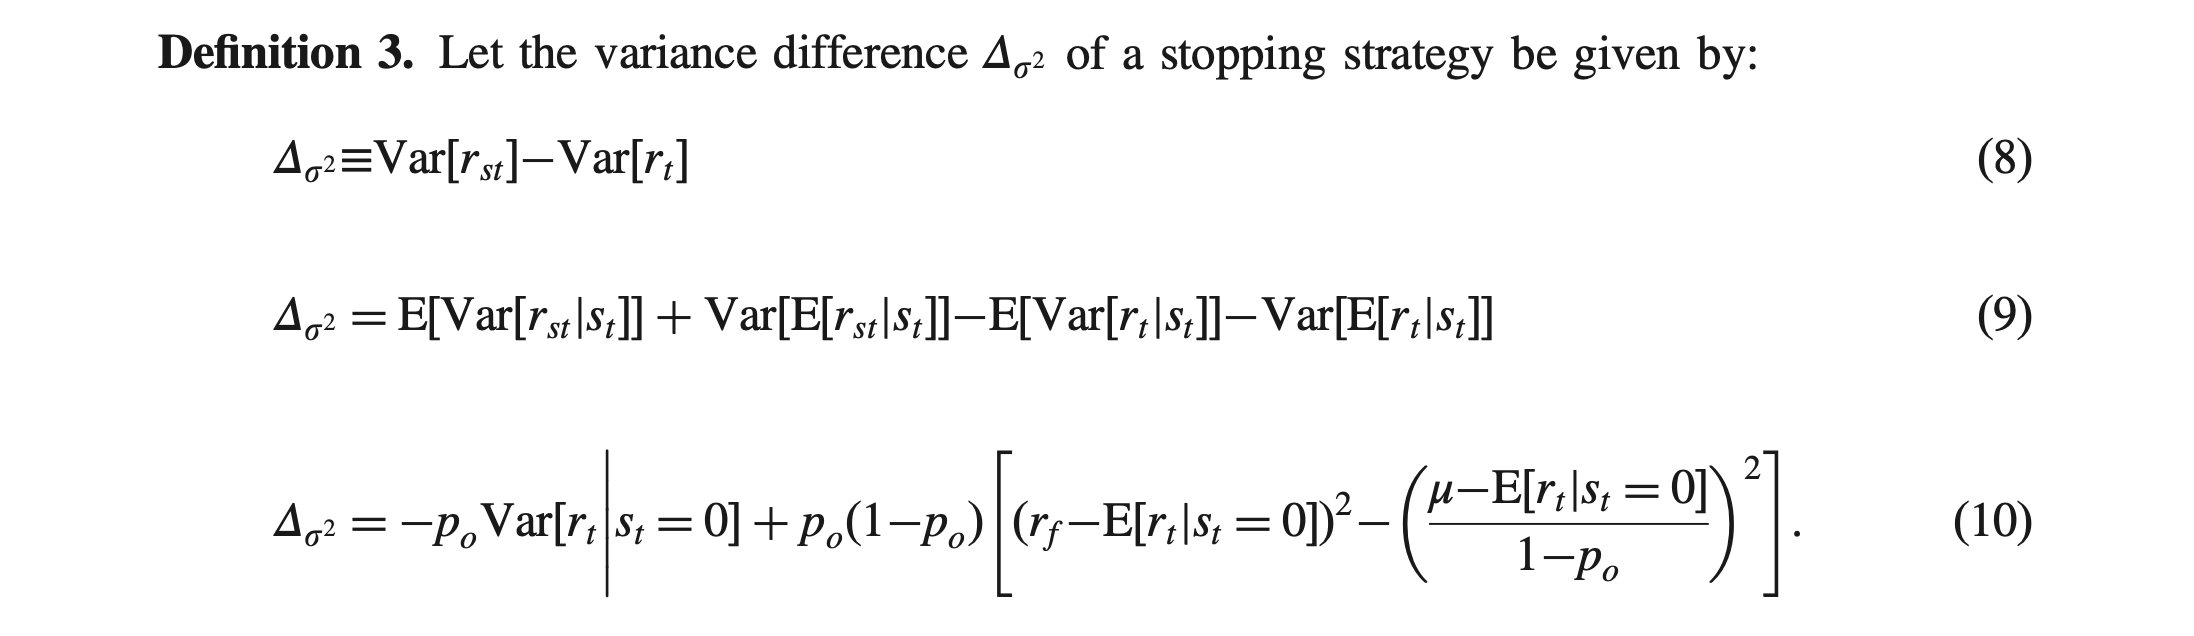

In [33]:
def diff_var(loss_thres,reentry_thres,j):
    return abs(r_st(loss_thres,reentry_thres,j).var()-rt.var())

In [34]:
diff_var(-0.001,-0.02,0)

9.815411615250066e-05

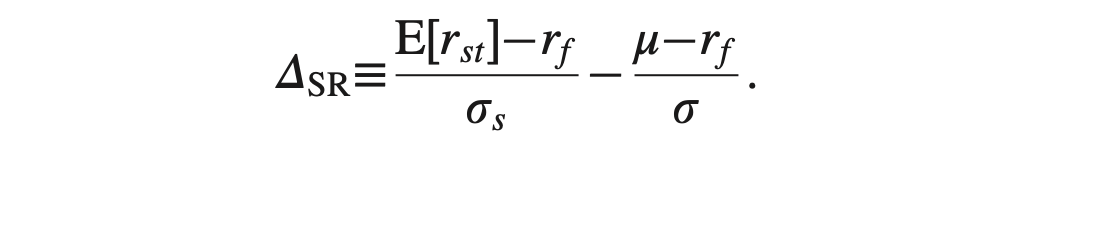

In [35]:
#assuimg sigma_s is the standard devaition of r_st
def sharpe_ratio(loss_thres,reentry_thres,j):
    a=(r_st(loss_thres,reentry_thres,j).mean()-rf)/r_st(loss_thres,reentry_thres,j).var()
    b=(rt.mean()-rf)/rt.var()
    return a-b

In [36]:
sharpe_ratio(-0.001,-0.02,0)

22.1906007334999

#### Evaluating the performance of simple stop-loss rules

##### Proposition1: Random Walk Hypothesis

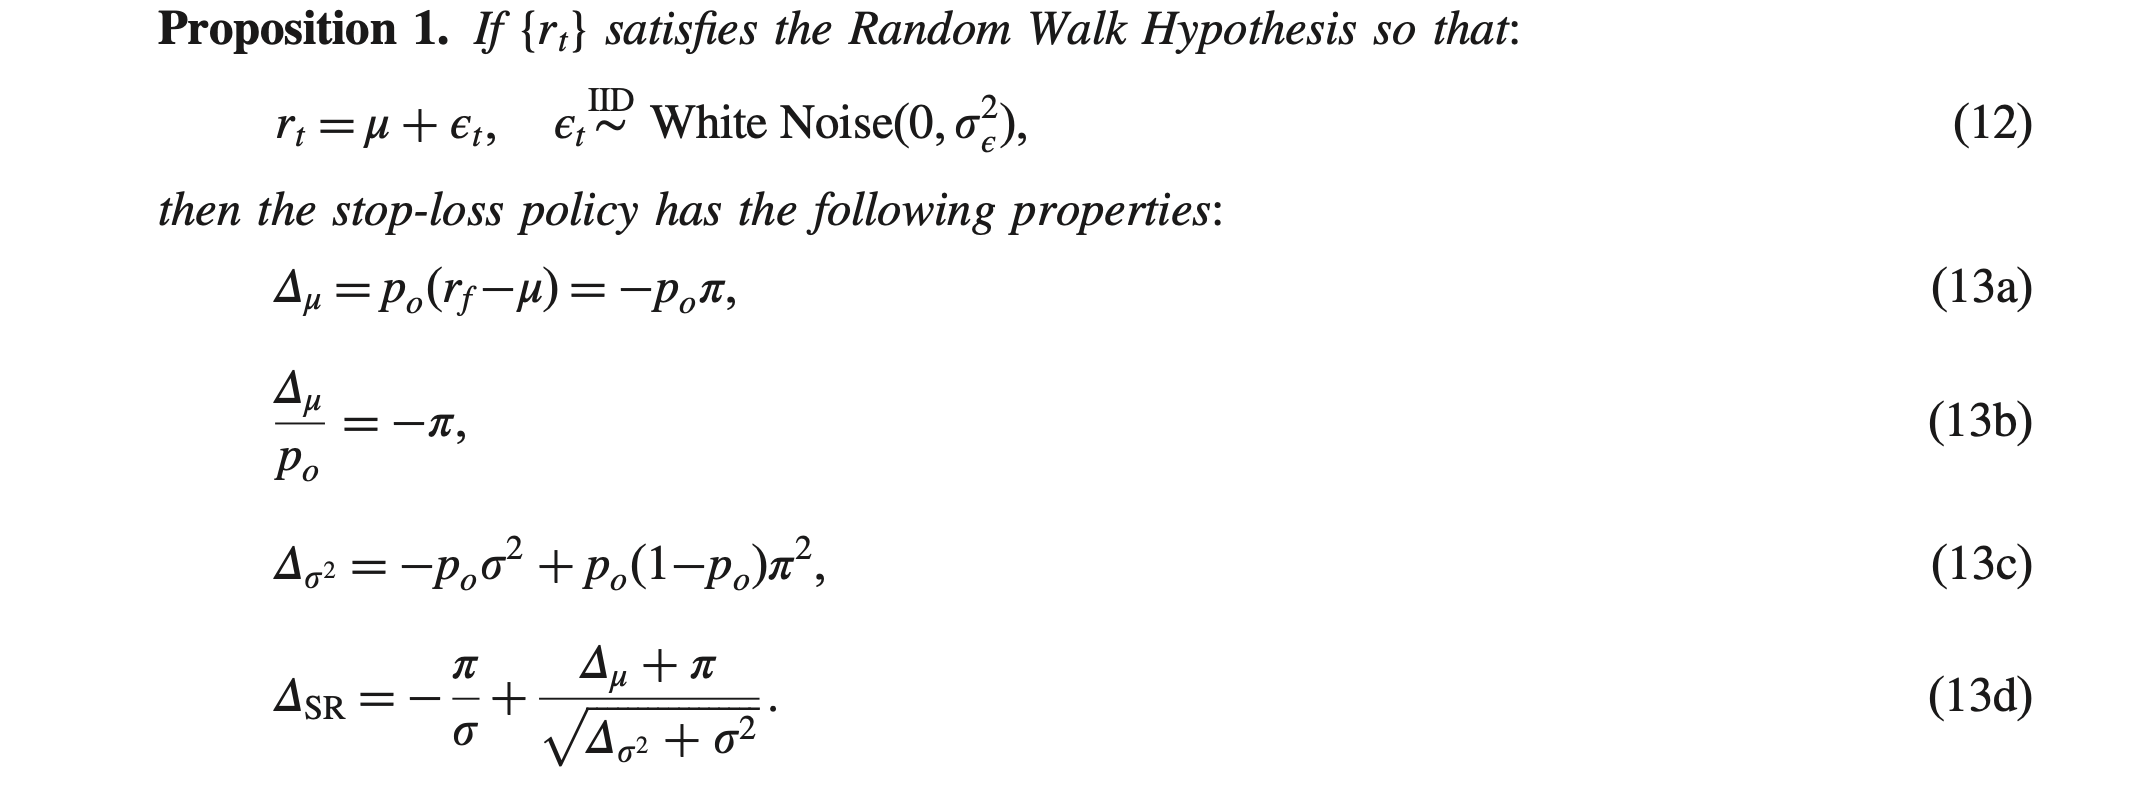

In [37]:
def diff_u(loss_thres,reentry_thres,j):
    return p0(loss_thres,reentry_thres,j)*(rf-rt.mean())

In [38]:
diff_u(-0.001,-0.02,0)

-6.654720473081631e-05

In [39]:
def neg_pi(loss_thres,reentry_thres,j):
    return diff_u(loss_thres,reentry_thres,j)/p0(loss_thres,reentry_thres,j)

In [40]:
neg_pi(-0.001,-0.02,0)

-0.00017774616156729283

In [41]:
def diff_sigma_2(loss_thres,reentry_thres,j):
    return abs((-rt.var()**2*p0(loss_thres,reentry_thres,j))+(p0(loss_thres,reentry_thres,j)*(1-p0(loss_thres,reentry_thres,j))*neg_pi(loss_thres,reentry_thres,j)**2))



In [42]:
diff_sigma_2(-0.001,-0.02,0)

1.4760815199274491e-08

In [43]:
def diff_SR(loss_thres,reentry_thres,j):
    a=neg_pi(loss_thres,reentry_thres,j)/rt.var()
    b=diff_u(loss_thres,reentry_thres,j)+(-neg_pi(loss_thres,reentry_thres,j))
    c=math.sqrt(diff_var(loss_thres,reentry_thres,j)+rt.var()**2)
    return a+(b/c)
    
    

In [44]:
diff_SR(.000000001,.000000002,0)

-0.7225256846955382

#### Mean Reversion and momentum

In [45]:
from ranges import Range, Inf


In [46]:
rho=Range(-1,1)

In [47]:
0.5 in rho

True

In [48]:
rho=-0.5

In [113]:
rho*(rt[100-1])+noise

0       2.329168
1      -0.322635
2      -0.386547
3      -0.460164
4      -0.162626
          ...   
4744   -0.441706
4745    0.623200
4746   -0.826577
4747    1.388579
4748   -0.036447
Length: 4749, dtype: float64

In [124]:
noise = np.random.normal(0,1,4749)

In [112]:
noise=pd.Series(noise)

In [105]:
rt.mean()+rho*(rt[100-1])+noise

array([ 2.32934575, -0.32245715, -0.38636882, ..., -0.82639937,
        1.38875645, -0.0362697 ])

In [121]:
def r_mean():
    for i in range(len(rt)):
        return rt.mean()+rho*rt[i-1]+noise
   
    

In [123]:
r_mean()

0       2.332952
1      -0.318851
2      -0.382762
3      -0.456380
4      -0.158842
          ...   
4744   -0.437922
4745    0.626984
4746   -0.822793
4747    1.392363
4748   -0.032663
Length: 4749, dtype: float64

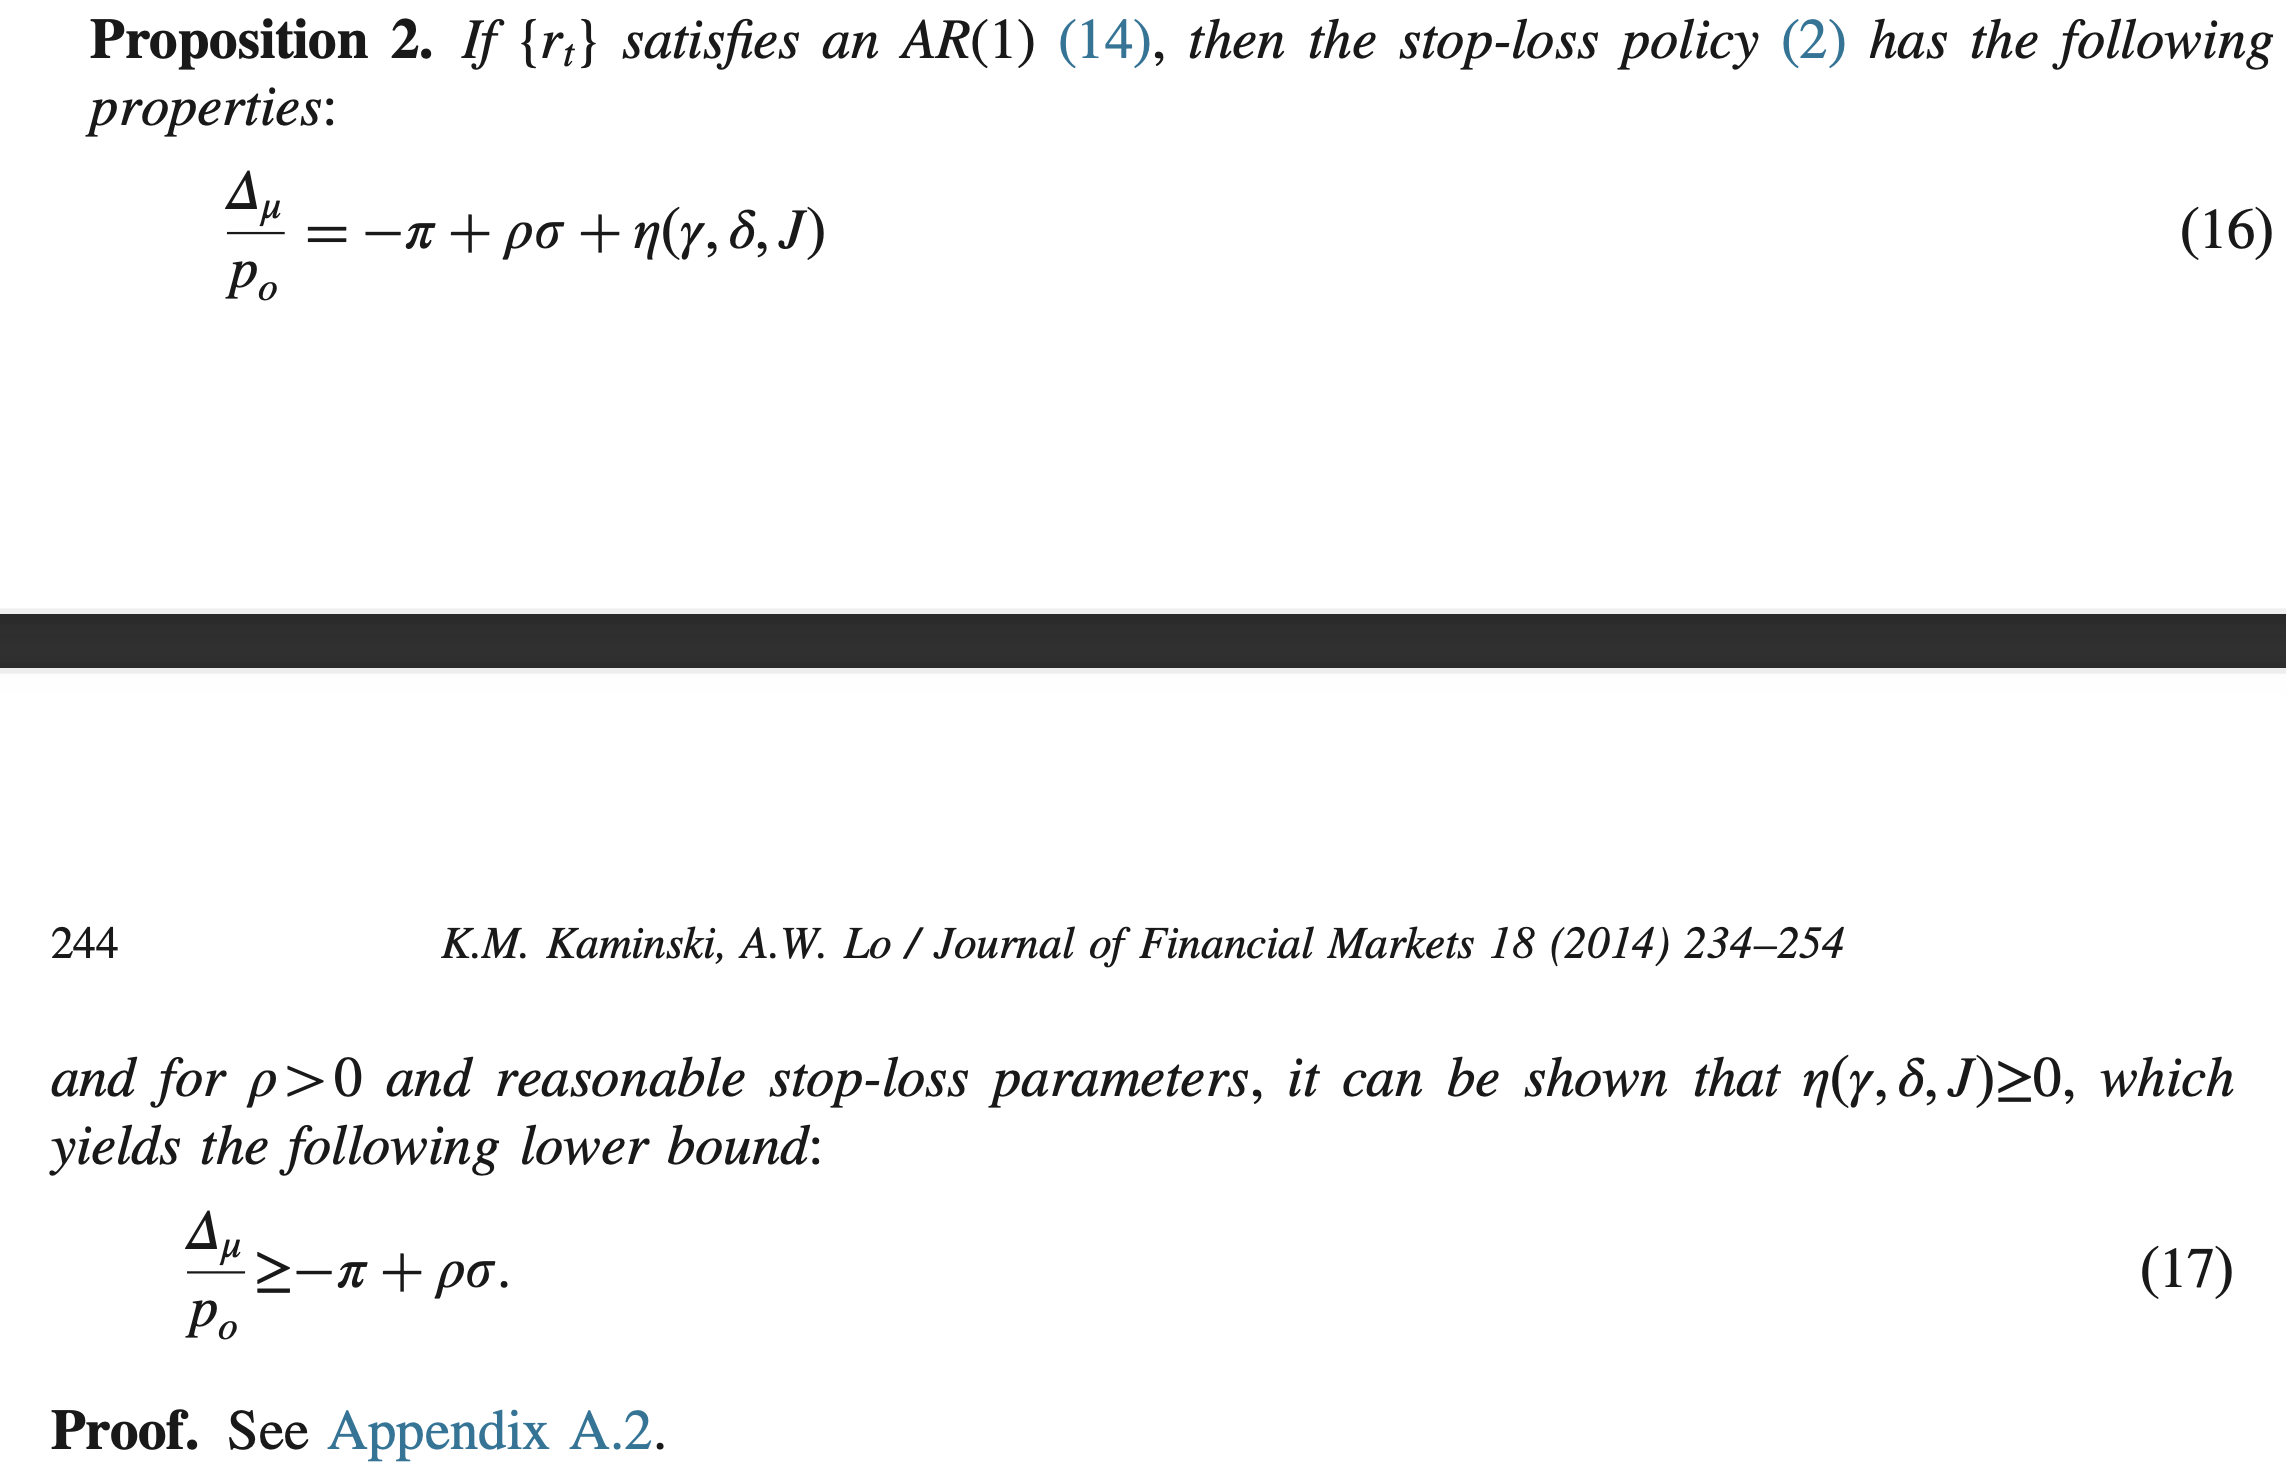

In [53]:
rho*((rt-1))

Date
1993-01-05         NaN
1993-01-06    0.497630
1993-01-07    0.509434
1993-01-08    0.507212
1993-01-11    0.490244
                ...   
2011-11-01    0.514174
2011-11-02    0.490622
2011-11-03    0.491964
2011-11-04    0.501582
2011-11-07    0.503606
Name: Close, Length: 4749, dtype: float64

In [155]:
neg_pi(-0.001,-0.02,0)+rho*rt.var()

-0.000299392174317652

In [156]:
neg_pi(-0.001,-0.02,0)+rho*rt.var()+pd.Series(stop_loss_policy(-0.001,-0.02,0))

0       0.999701
1       0.999701
2      -0.000299
3       0.999701
4       0.999701
          ...   
4744   -0.000299
4745    0.999701
4746    0.999701
4747   -0.000299
4748    0.999701
Length: 4749, dtype: float64

 We can see that η(γ;δ;J)≥0 